In [ ]:
import seaborn as sns
import pandas as pd
tips = sns.load_dataset('tips')  # Seaborn 내장 'tips' 데이터셋 로드
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


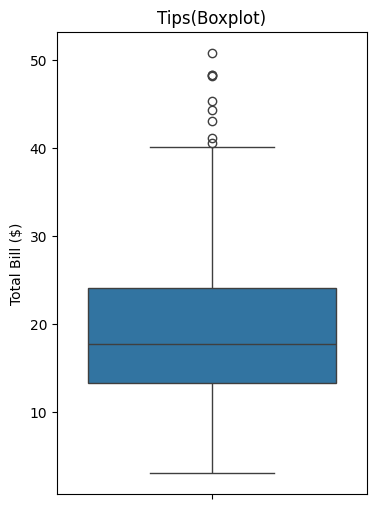

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,6))
sns.boxplot(y=tips['total_bill'])
plt.title('Tips(Boxplot)')
plt.ylabel('Total Bill ($)')
plt.show()


In [ ]:
Q1 = tips['total_bill'].quantile(0.25)
Q3 = tips['total_bill'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = tips[(tips['total_bill'] < lower_bound) | (tips['total_bill'] > upper_bound)]
print(f"이상치 개수: {outliers.shape[0]}")
print(outliers['total_bill'])

이상치 개수: 9
59     48.27
102    44.30
142    41.19
156    48.17
170    50.81
182    45.35
184    40.55
197    43.11
212    48.33
Name: total_bill, dtype: float64


In [ ]:
import numpy as np

# Z-점수 기반 이상치 탐지
mean = tips['total_bill'].mean()
std = tips['total_bill'].std()
threshold = 3  # 임계값 (3표준편차)
z_scores = (tips['total_bill'] - mean) / std
outliers_z = tips[np.abs(z_scores) > threshold]
print(f"이상치 개수: {outliers_z.shape[0]}")
print(outliers_z['total_bill'])


이상치 개수: 4
59     48.27
156    48.17
170    50.81
212    48.33
Name: total_bill, dtype: float64


In [ ]:
# IQR 기준으로 이상치 제거
tips_clean = tips[(tips['total_bill'] >= lower_bound) & (tips['total_bill'] <= upper_bound)]
print(tips.shape, "->", tips_clean.shape)
print("원래 평균:", tips['total_bill'].mean())
print("제거 후 평균:", tips_clean['total_bill'].mean())
print("원래 중앙값:", tips['total_bill'].median())

(244, 7) -> (235, 7)
원래 평균: 19.78594262295082
제거 후 평균: 18.798680851063832
원래 중앙값: 17.795


In [ ]:
# Z-점수 기준으로 이상치 제거
threshold = 3
z_scores = (tips['total_bill'] - mean) / std
tips_clean_z = tips[np.abs(z_scores) <= threshold]
print(tips.shape, "->", tips_clean_z.shape)
print("원래 평균:", tips['total_bill'].mean())
print("제거 후 평균:", tips_clean_z['total_bill'].mean())
print("원래 중앙값:", tips['total_bill'].median())

(244, 7) -> (240, 7)
원래 평균: 19.78594262295082
제거 후 평균: 19.30079166666667
원래 중앙값: 17.795


In [ ]:
from sklearn.preprocessing import RobustScaler
X = tips[['total_bill', 'tip']]
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
print("원본 5개:\n", X.head(5))
print("스케일 후 5개:\n", X_scaled[:5])


원본 5개:
    total_bill   tip
0       16.99  1.01
1       10.34  1.66
2       21.01  3.50
3       23.68  3.31
4       24.59  3.61
스케일 후 5개:
 [[-0.07467532 -1.2096    ]
 [-0.69155844 -0.7936    ]
 [ 0.29823748  0.384     ]
 [ 0.54591837  0.2624    ]
 [ 0.63033395  0.4544    ]]


In [ ]:
data = {'Name': ['Kim', 'Lee', 'Lee', 'Choi'],
         'Score': [90, 85, 85, 95]}
df = pd.DataFrame(data)
print(df)
print(df.duplicated())      # 각 행이 이전 행들과 중복이면 True
df_no_dup = df.drop_duplicates()
print(df_no_dup)

   Name  Score
0   Kim     90
1   Lee     85
2   Lee     85
3  Choi     95
0    False
1    False
2     True
3    False
dtype: bool
   Name  Score
0   Kim     90
1   Lee     85
3  Choi     95
